# BTC Machine-Learning Model Training

## KNeighbors Model

In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import sys

# Add the features directory to path - navigate from models/code to features
sys.path.append(os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'features'))
from trend_indicator_pipeline_pkg import TrendIndicatorPipeline, MomentumIndicatorPipeline, VolatilityIndicatorPipeline, CorrelationIndicatorPipeline, FractalDimensionPipeline

from arcticdb.version_store.helper import ArcticMemoryConfig
from arcticdb import Arctic

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from pycaret.classification import setup, compare_models, save_model, predict_model, pull, tune_model, finalize_model, create_model

In [2]:
# load dataset
df = pd.read_csv("E:\Coding\Crypto_Research\data\BTCUSD_2023-1min_ML_with_FDs.csv")

df = df.dropna()

df.head()

,Timestamp,Unnamed: 0.1,Unnamed: 0,Open,High,Low,Close,Volume,ema_7d,ema_20d,...,bb_mid_20d,bb_upper_20d,bb_lower_20d,atr_14d,fd_14d,future_close,future_return,future_trend,fd_7d,fd_30d
50398,2023-02-10 03:16:00,50398,50398,21851.5,21856.5,21851.2,21853.3,0.000218,22893.243714,22435.379752,...,22953.582628,23956.433515,21950.731741,11.869257,0.637013,22067.6,0.009806,0,0.394029,0.040634
50399,2023-02-10 03:17:00,50399,50399,21853.2,21853.2,21851.2,21852.7,0.000121,22893.037277,22435.339289,...,22953.610139,23956.296743,21950.923535,11.868773,0.636961,22063.4,0.009642,0,0.394248,0.040654
50400,2023-02-10 03:18:00,50400,50400,21854.3,21855.1,21847.1,21849.9,0.000298,22892.830326,22435.298635,...,22953.637677,23956.159451,21951.115903,11.868581,0.636790,22066.1,0.009895,0,0.394217,0.040658
50401,2023-02-10 03:19:00,50401,50401,21849.3,21849.9,21840.3,21841.1,0.000497,22892.621670,22435.257373,...,22953.665097,23956.021941,21951.308253,11.868468,0.636835,22066.4,0.010315,0,0.394315,0.040709
50402,2023-02-10 03:20:00,50402,50402,21840.9,21853.0,21840.2,21845.7,0.000385,22892.413968,22435.216433,...,22953.692740,23955.883441,21951.502039,11.868515,0.636961,22065.9,0.010080,0,0.394285,0.040717


In [4]:
# Retrain KNeighbors Model 10 times with different seeds
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Initialize list to store models and their performance
knn_models = []
knn_performance = []
seeds = [42, 123, 456, 789, 321, 654, 987, 147, 258, 369]

print("Training KNeighbors models with different seeds...")
print("=" * 50)

for i, seed in enumerate(seeds):
    print(f"\nTraining KNN Model {i+1}/10 with seed: {seed}")
    
    # Set up PyCaret with new seed
    clf_setup_knn = setup(
        data=df,
        target='future_trend',
        session_id=seed,
        train_size=0.7,
        fold_shuffle=True,
        fold=12,
        verbose=False,
        ignore_features=['Unnamed: 0.1', 'Timestamp', 'Unnamed: 0', 'future_close', 'future_return']
    )
    
    # Create and train KNN model
    knn_model = create_model('knn', verbose=False)
    
    # Tune the model
    knn_tuned = tune_model(knn_model, verbose=False)
    
    # Finalize the model (train on full dataset)
    knn_final = finalize_model(knn_tuned)
    
    # Store the model
    knn_models.append(knn_final)
    
    # Get model performance metrics
    model_results = pull()
    best_metrics = model_results.iloc[0]  # Get best performing configuration
    
    knn_performance.append({
        'seed': seed,
        'model_index': i,
        'accuracy': best_metrics['Accuracy'],
        'auc': best_metrics['AUC'],
        'recall': best_metrics['Recall'],
        'precision': best_metrics['Prec.'],
        'f1': best_metrics['F1'],
        'kappa': best_metrics['Kappa']
    })
    
    print(f"✓ Model {i+1} trained - Accuracy: {best_metrics['Accuracy']:.4f}, AUC: {best_metrics['AUC']:.4f}")

print(f"\n✓ All 10 KNeighbors models trained successfully!")
print(f"Models stored in: knn_models list")
print(f"Performance metrics stored in: knn_performance list")

Training KNeighbors models with different seeds...

Training KNN Model 1/10 with seed: 42
✓ Model 1 trained - Accuracy: 0.9949, AUC: 0.9994

Training KNN Model 2/10 with seed: 123
✓ Model 2 trained - Accuracy: 0.9963, AUC: 0.9998

Training KNN Model 3/10 with seed: 456
✓ Model 3 trained - Accuracy: 0.9951, AUC: 0.9996

Training KNN Model 4/10 with seed: 789
✓ Model 4 trained - Accuracy: 0.9963, AUC: 0.9991

Training KNN Model 5/10 with seed: 321
✓ Model 5 trained - Accuracy: 0.9964, AUC: 0.9992

Training KNN Model 6/10 with seed: 654
✓ Model 6 trained - Accuracy: 0.9946, AUC: 0.9996

Training KNN Model 7/10 with seed: 987
✓ Model 7 trained - Accuracy: 0.9953, AUC: 0.9969

Training KNN Model 8/10 with seed: 147
✓ Model 8 trained - Accuracy: 0.9953, AUC: 0.9996

Training KNN Model 9/10 with seed: 258
✓ Model 9 trained - Accuracy: 0.9953, AUC: 0.9996

Training KNN Model 10/10 with seed: 369
✓ Model 10 trained - Accuracy: 0.9945, AUC: 0.9988

✓ All 10 KNeighbors models trained successfully

Running fee-aware backtesting for all 10 KNeighbors models...

Backtesting KNN Model 1/10 (Seed: 42)
----------------------------------------
Initial Capital      : $10,000.00
Final Portfolio Value: $19,241.05
Net Profit           : $9,241.05
Total Return         : 92.41%
Sharpe Ratio         : 2.91
Max Drawdown         : 15.30%
Win Rate             : 81.03%
Total Trades         : 58
Avg Trade Return     : 1.26%
Fee-Aware Exits      : 53
Stop-Loss Exits      : 5


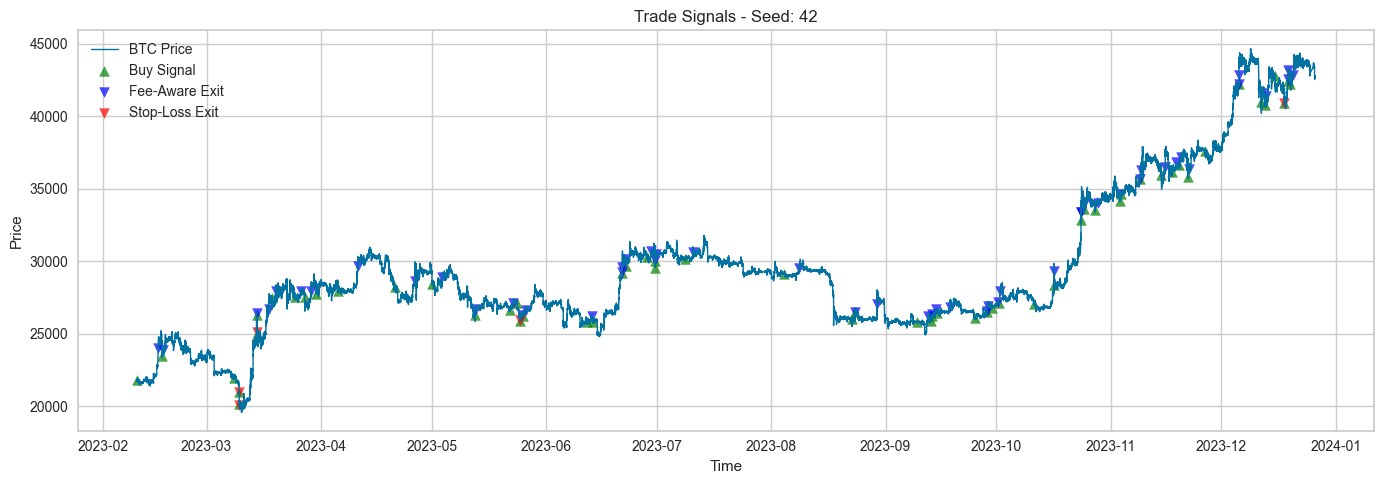

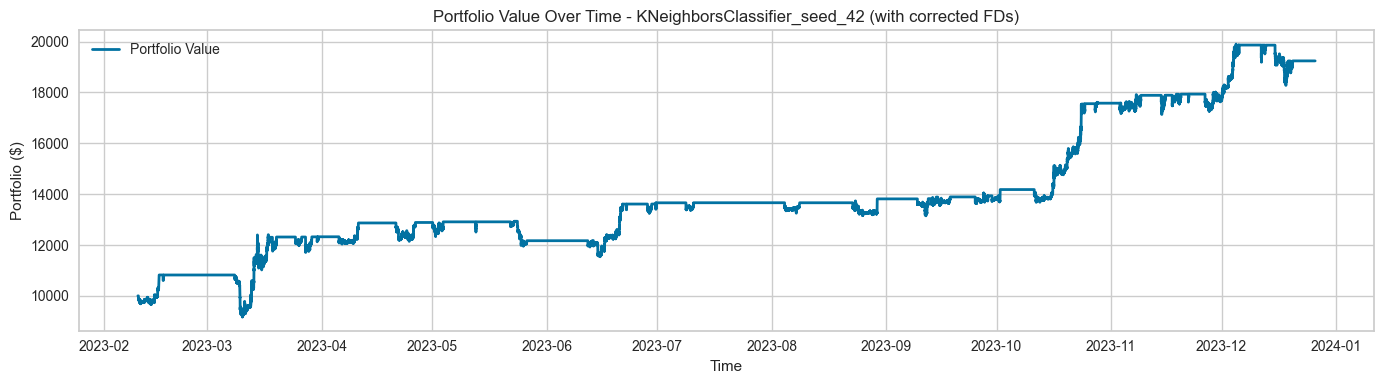


Backtesting KNN Model 2/10 (Seed: 123)
----------------------------------------
Initial Capital      : $10,000.00
Final Portfolio Value: $18,856.07
Net Profit           : $8,856.07
Total Return         : 88.56%
Sharpe Ratio         : 2.76
Max Drawdown         : 15.32%
Win Rate             : 78.46%
Total Trades         : 65
Avg Trade Return     : 1.09%
Fee-Aware Exits      : 60
Stop-Loss Exits      : 5


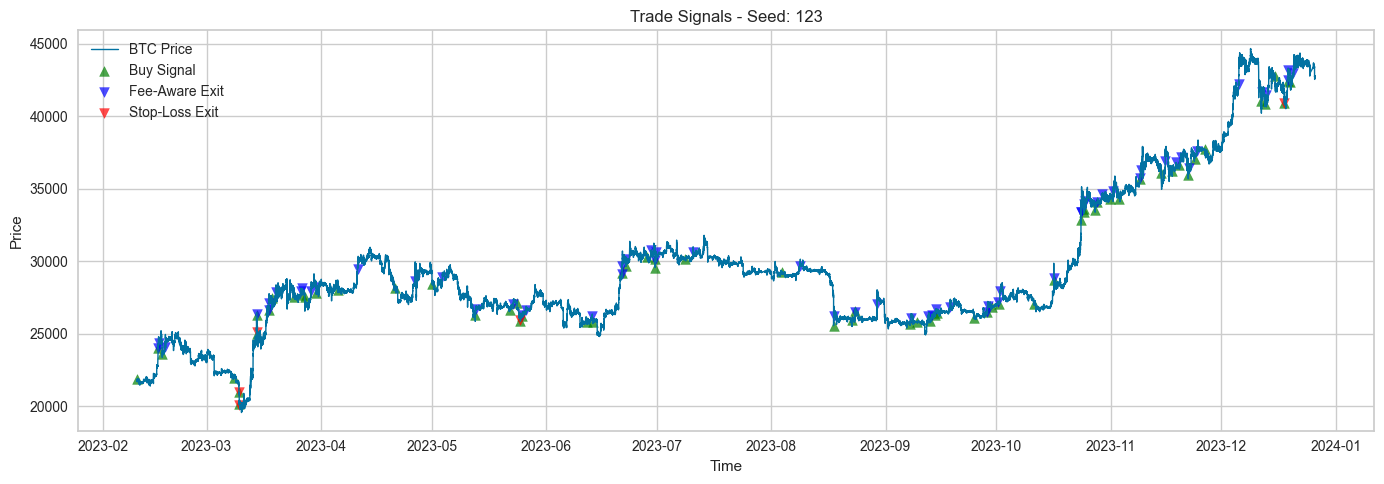

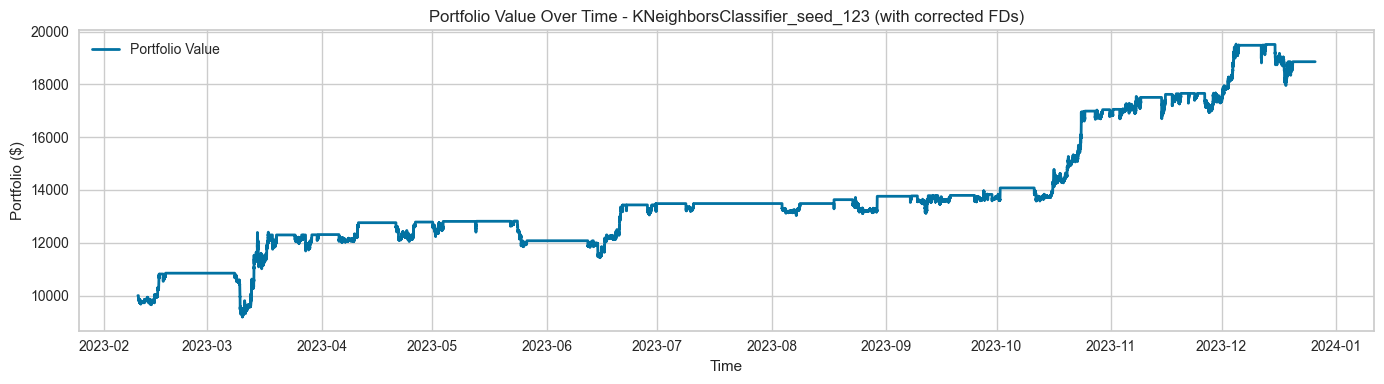


Backtesting KNN Model 3/10 (Seed: 456)
----------------------------------------
Initial Capital      : $10,000.00
Final Portfolio Value: $19,455.77
Net Profit           : $9,455.77
Total Return         : 94.56%
Sharpe Ratio         : 2.96
Max Drawdown         : 15.29%
Win Rate             : 82.14%
Total Trades         : 56
Avg Trade Return     : 1.32%
Fee-Aware Exits      : 52
Stop-Loss Exits      : 4


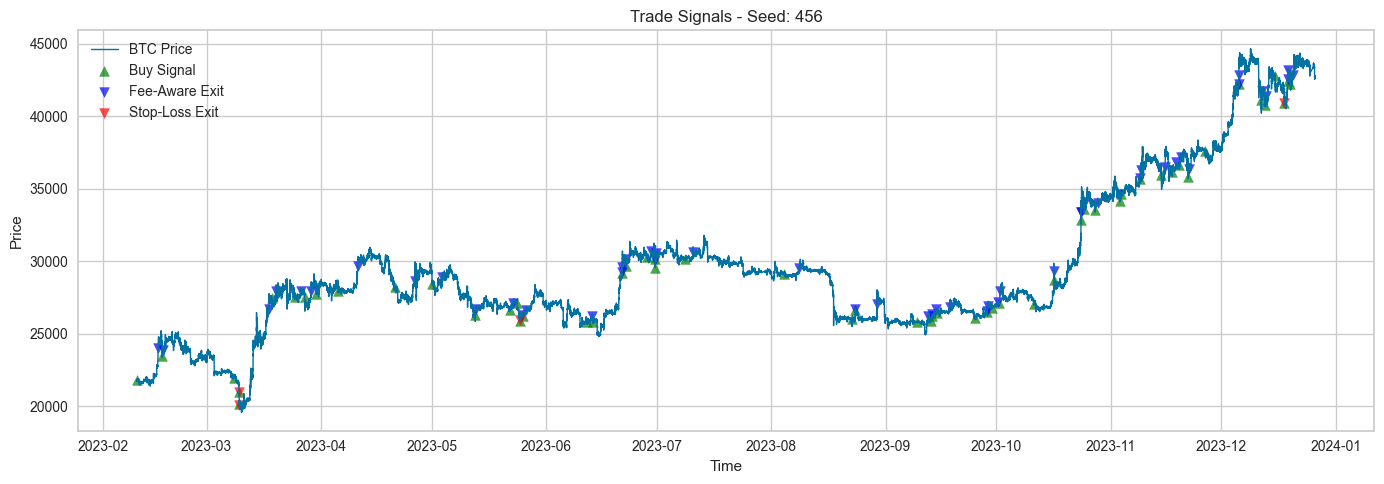

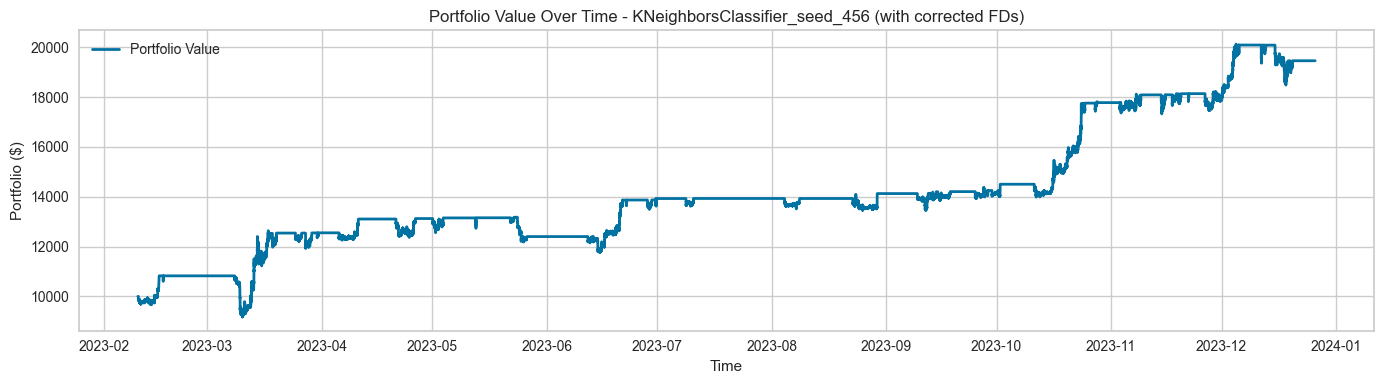


Backtesting KNN Model 4/10 (Seed: 789)
----------------------------------------
Initial Capital      : $10,000.00
Final Portfolio Value: $18,856.07
Net Profit           : $8,856.07
Total Return         : 88.56%
Sharpe Ratio         : 2.76
Max Drawdown         : 15.32%
Win Rate             : 78.46%
Total Trades         : 65
Avg Trade Return     : 1.09%
Fee-Aware Exits      : 60
Stop-Loss Exits      : 5


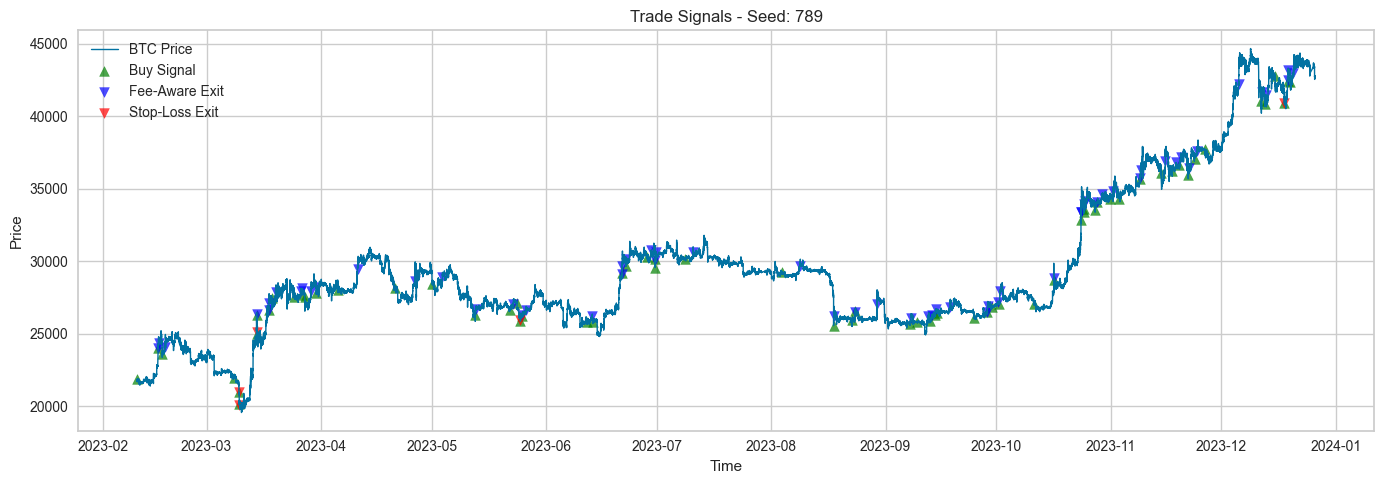

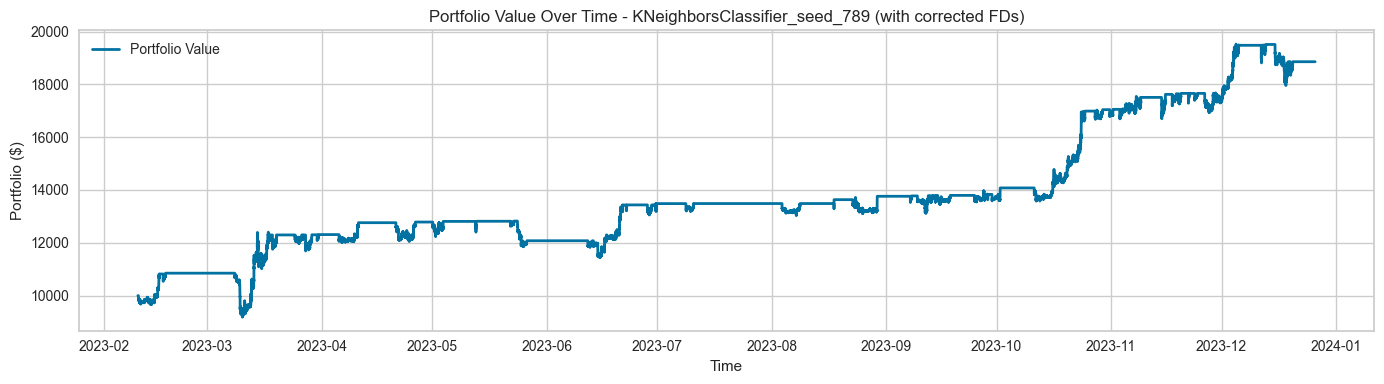


Backtesting KNN Model 5/10 (Seed: 321)
----------------------------------------
Initial Capital      : $10,000.00
Final Portfolio Value: $18,856.07
Net Profit           : $8,856.07
Total Return         : 88.56%
Sharpe Ratio         : 2.76
Max Drawdown         : 15.32%
Win Rate             : 78.46%
Total Trades         : 65
Avg Trade Return     : 1.09%
Fee-Aware Exits      : 60
Stop-Loss Exits      : 5


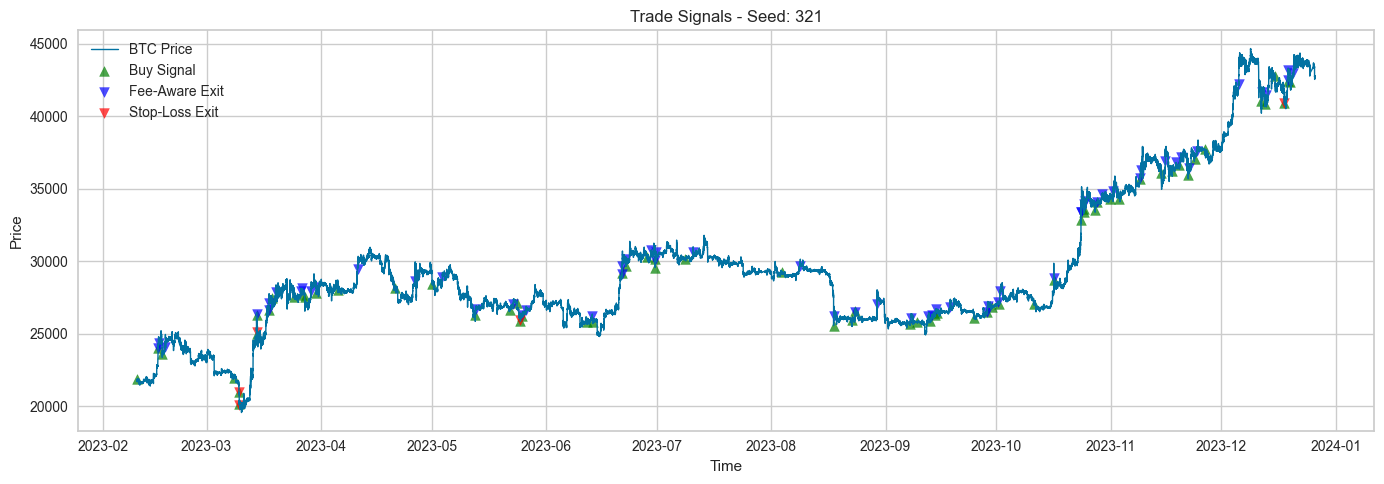

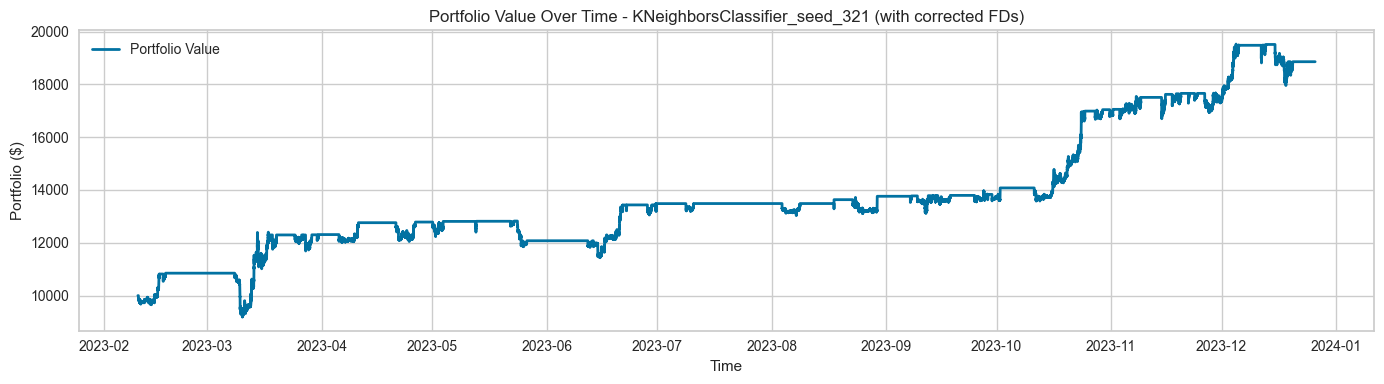


Backtesting KNN Model 6/10 (Seed: 654)
----------------------------------------
Initial Capital      : $10,000.00
Final Portfolio Value: $19,455.39
Net Profit           : $9,455.39
Total Return         : 94.55%
Sharpe Ratio         : 2.96
Max Drawdown         : 15.30%
Win Rate             : 82.14%
Total Trades         : 56
Avg Trade Return     : 1.32%
Fee-Aware Exits      : 52
Stop-Loss Exits      : 4


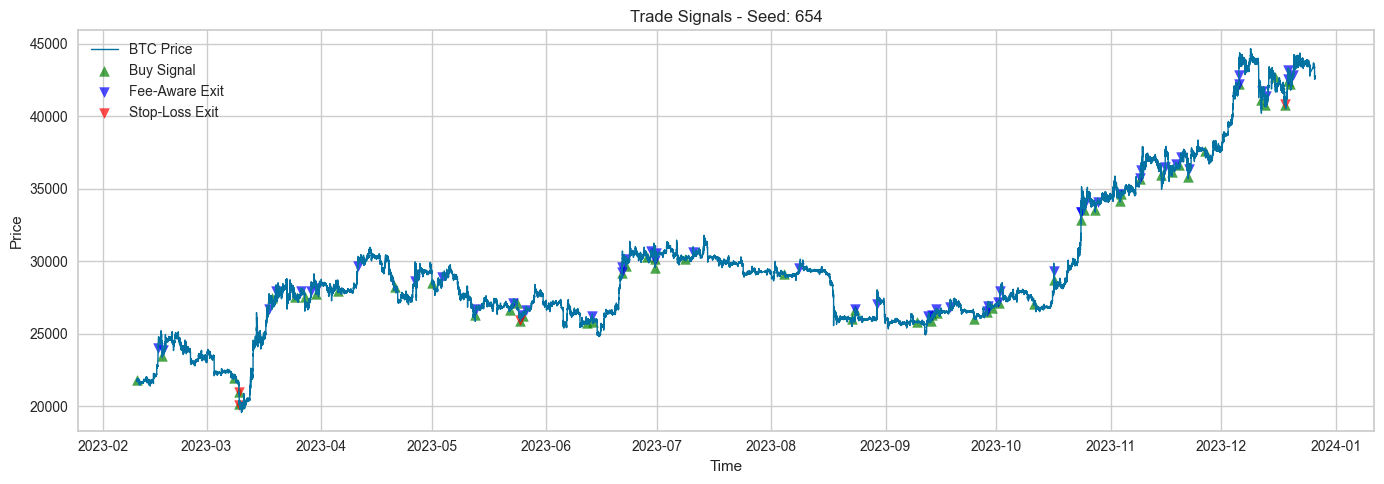

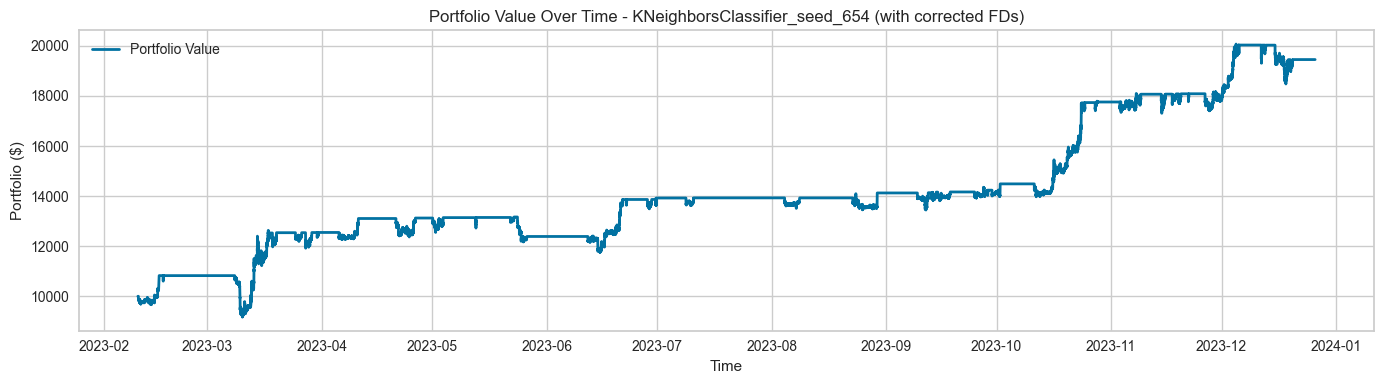


Backtesting KNN Model 7/10 (Seed: 987)
----------------------------------------
Initial Capital      : $10,000.00
Final Portfolio Value: $18,455.32
Net Profit           : $8,455.32
Total Return         : 84.55%
Sharpe Ratio         : 2.70
Max Drawdown         : 15.29%
Win Rate             : 79.03%
Total Trades         : 62
Avg Trade Return     : 1.10%
Fee-Aware Exits      : 57
Stop-Loss Exits      : 5


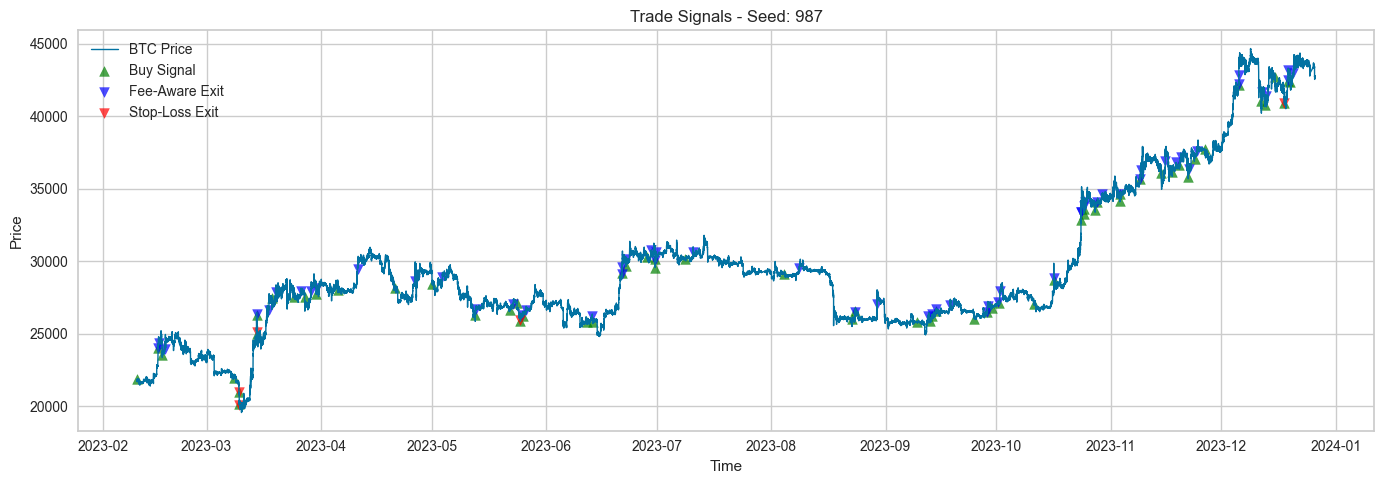

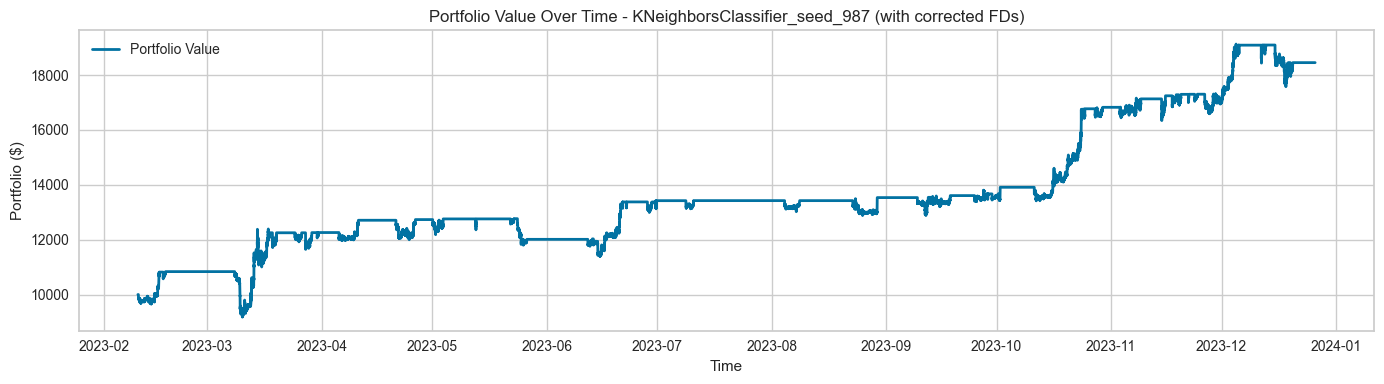


Backtesting KNN Model 8/10 (Seed: 147)
----------------------------------------
Initial Capital      : $10,000.00
Final Portfolio Value: $18,856.07
Net Profit           : $8,856.07
Total Return         : 88.56%
Sharpe Ratio         : 2.76
Max Drawdown         : 15.32%
Win Rate             : 78.46%
Total Trades         : 65
Avg Trade Return     : 1.09%
Fee-Aware Exits      : 60
Stop-Loss Exits      : 5


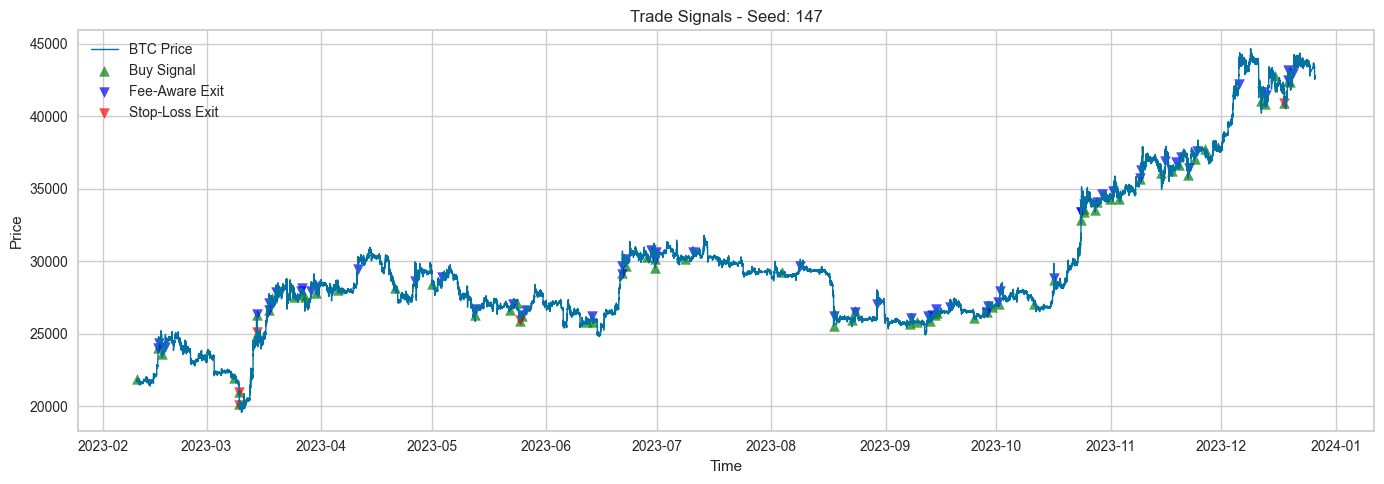

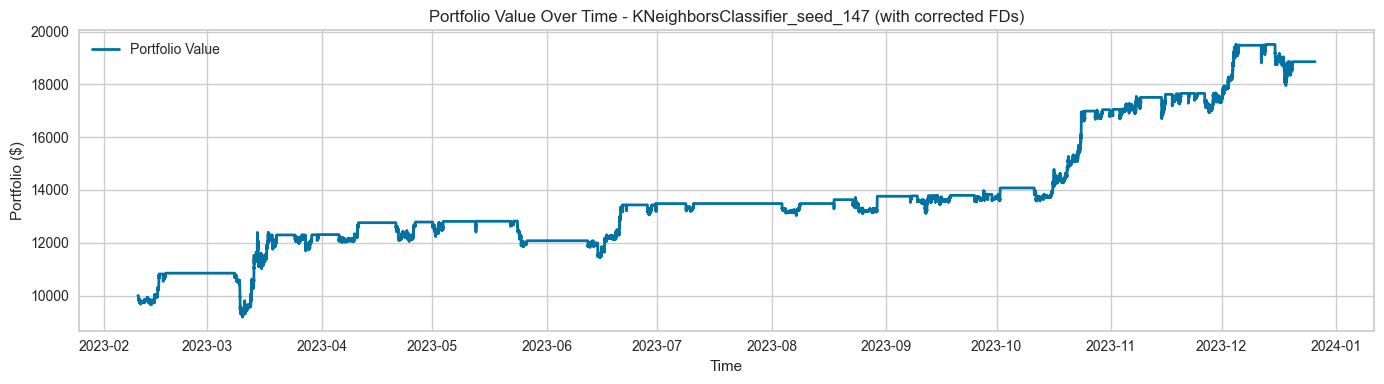


Backtesting KNN Model 9/10 (Seed: 258)
----------------------------------------
Initial Capital      : $10,000.00
Final Portfolio Value: $18,856.07
Net Profit           : $8,856.07
Total Return         : 88.56%
Sharpe Ratio         : 2.76
Max Drawdown         : 15.32%
Win Rate             : 78.46%
Total Trades         : 65
Avg Trade Return     : 1.09%
Fee-Aware Exits      : 60
Stop-Loss Exits      : 5


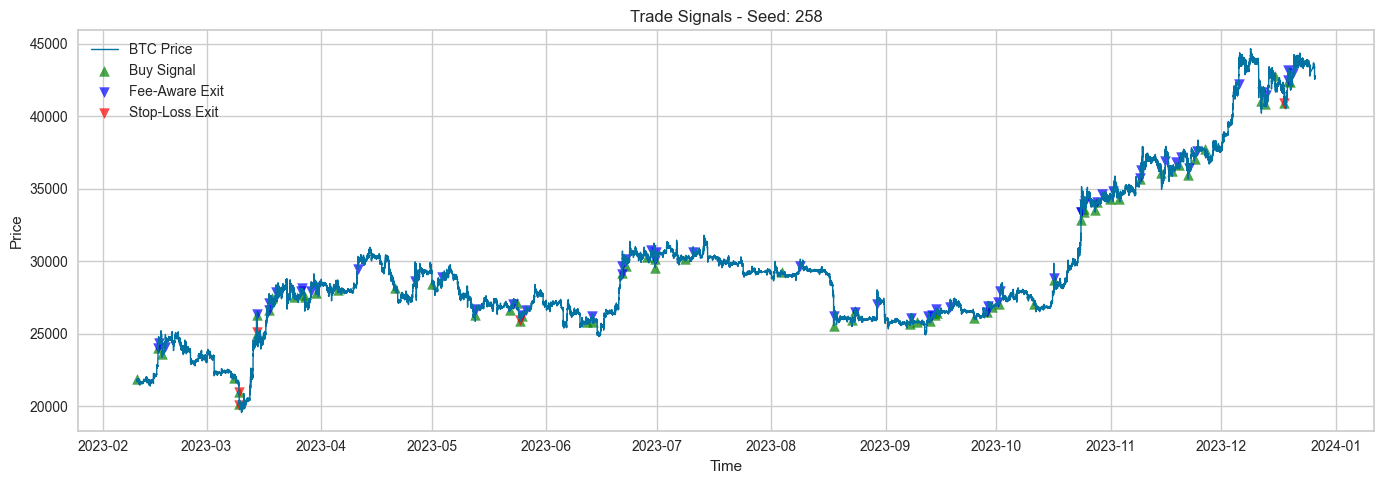

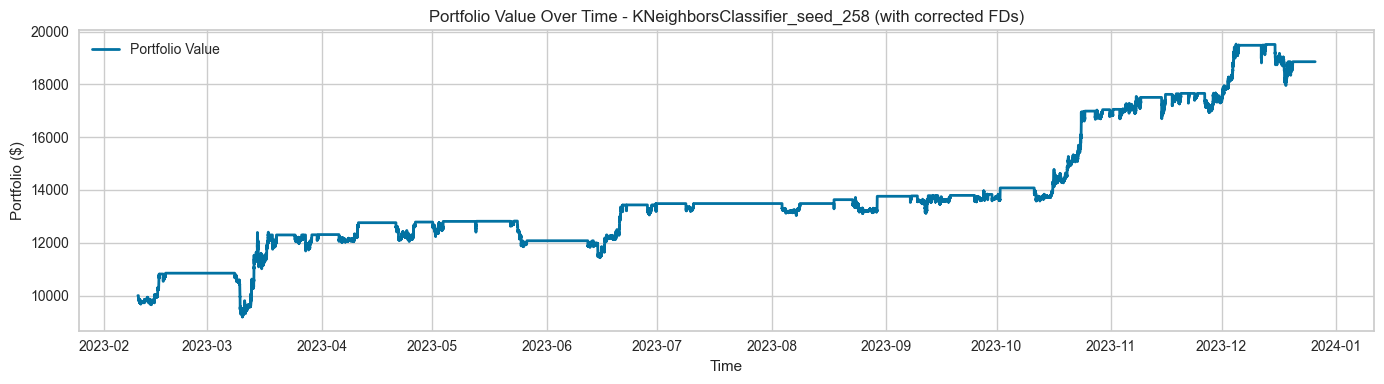


Backtesting KNN Model 10/10 (Seed: 369)
----------------------------------------
Initial Capital      : $10,000.00
Final Portfolio Value: $18,953.68
Net Profit           : $8,953.68
Total Return         : 89.54%
Sharpe Ratio         : 2.82
Max Drawdown         : 15.30%
Win Rate             : 77.97%
Total Trades         : 59
Avg Trade Return     : 1.21%
Fee-Aware Exits      : 54
Stop-Loss Exits      : 5


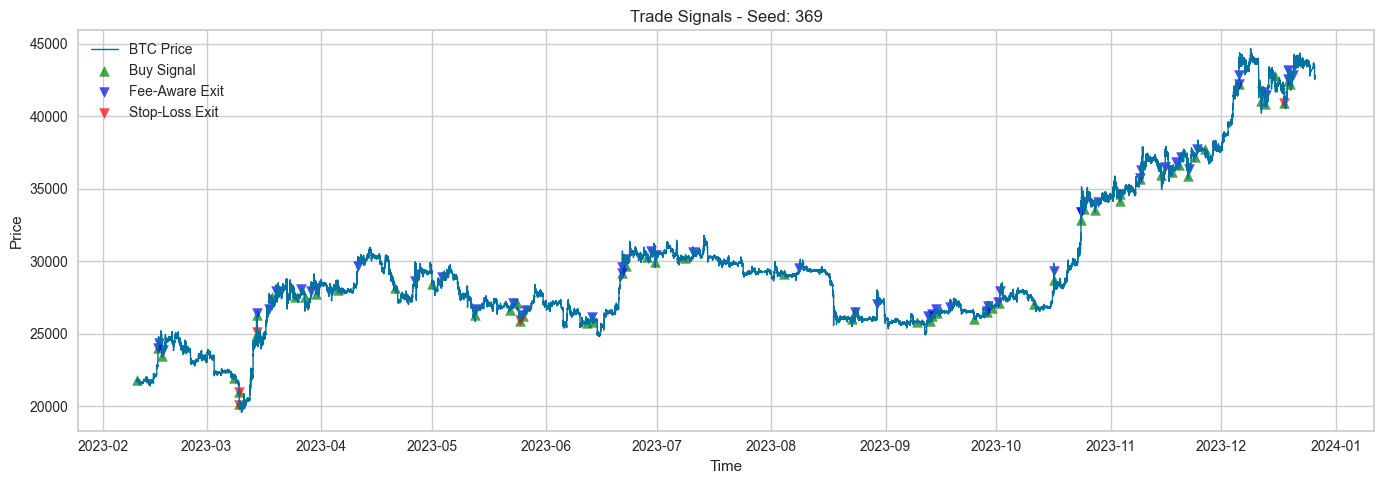

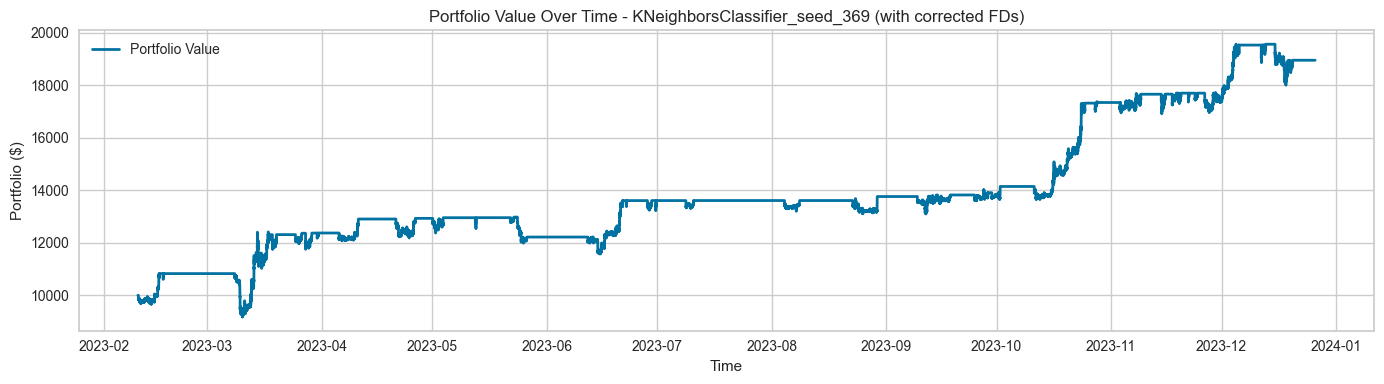


✓ Fee-aware backtesting completed for all 10 KNeighbors models!
Results stored in: knn_strategy_results dictionary


In [5]:
# Fee-Aware Backtesting for all 10 KNeighbors models
initial_capital = 10000
fee_pct = 0.0075  # 0.75% fee per trade
stop_loss_pct = 0.05  # 5% stop loss
knn_strategy_results = {}

print("Running fee-aware backtesting for all 10 KNeighbors models...")
print("=" * 60)

for model_idx, model in enumerate(knn_models):
    seed = seeds[model_idx]
    model_name = f'KNeighborsClassifier_seed_{seed}'
    print(f'\nBacktesting KNN Model {model_idx+1}/10 (Seed: {seed})')
    print("-" * 40)

    # Predict on entire dataset
    pred_df = predict_model(model, data=df.copy(), verbose=False)
    pred_df['timestamp'] = pd.to_datetime(pred_df['Timestamp'])
    pred_df.set_index('timestamp', inplace=True)
    pred_df = pred_df.sort_index()

    # Initialize variables
    position = 0
    cash = initial_capital
    trade_log = []
    portfolio_values = []
    in_trade = False
    entry_price = 0
    entry_time = None
    total_invested = 0
    entry_fees = 0

    for i in range(len(pred_df)):
        row = pred_df.iloc[i]
        signal = row['prediction_label']
        current_price = row['Close']
        date = row.name

        # Entry Logic: Buy signal
        if signal == 1 and not in_trade:
            available_for_investment = cash
            gross_position_value = available_for_investment / (1 + fee_pct)
            position = gross_position_value / current_price
            entry_fees = gross_position_value * fee_pct
            total_invested = gross_position_value + entry_fees
            entry_price = current_price
            entry_time = date
            cash = 0
            in_trade = True

        # Exit Logic: Fee-aware exit or Stop-loss
        elif in_trade:
            current_value = position * current_price
            price_change = (current_value - total_invested) / total_invested
            
            # Check for stop-loss
            stop_loss_hit = price_change <= -stop_loss_pct
            
            # Fee-aware exit logic
            fee_checker = (current_price - entry_price) / entry_price > fee_pct * 2
            sell_signal = signal == 0
            fee_aware_exit = sell_signal and fee_checker
            
            if fee_aware_exit or stop_loss_hit:
                # Calculate exit with fees
                gross_exit_value = position * current_price
                exit_fees = gross_exit_value * fee_pct
                exit_cash = gross_exit_value - exit_fees
                
                # Calculate PnL
                pnl = exit_cash - total_invested
                return_pct = pnl / total_invested * 100
                
                # Determine exit type
                if stop_loss_hit:
                    exit_type = 'Stop-Loss'
                elif fee_aware_exit:
                    exit_type = 'Fee-Aware Signal Exit'
                else:
                    exit_type = 'Signal Exit'
                
                # Log the trade
                trade_log.append({
                    'Entry Time': entry_time,
                    'Entry Price': round(entry_price, 2),
                    'Exit Time': date,
                    'Exit Price': round(current_price, 2),
                    'Investment ($)': round(total_invested, 2),
                    'Exit Value ($)': round(exit_cash, 2),
                    'Entry Fees ($)': round(entry_fees, 2),
                    'Exit Fees ($)': round(exit_fees, 2),
                    'PnL ($)': round(pnl, 2),
                    'Return (%)': round(return_pct, 2),
                    'Price Change (%)': round((current_price - entry_price) / entry_price * 100, 2),
                    'Fee Checker': fee_checker,
                    'Exit Type': exit_type
                })
                
                cash = exit_cash
                position = 0
                in_trade = False
                total_invested = 0

        # Record portfolio value
        if in_trade:
            current_gross_value = position * current_price
            estimated_exit_fees = current_gross_value * fee_pct
            portfolio_value = current_gross_value - estimated_exit_fees
        else:
            portfolio_value = cash
            
        portfolio_values.append({'timestamp': date, 'portfolio': portfolio_value})

    # Handle remaining position
    if in_trade:
        final_price = pred_df['Close'].iloc[-1]
        gross_exit_value = position * final_price
        exit_fees = gross_exit_value * fee_pct
        exit_cash = gross_exit_value - exit_fees
        pnl = exit_cash - total_invested
        return_pct = pnl / total_invested * 100
        
        trade_log.append({
            'Entry Time': entry_time,
            'Entry Price': round(entry_price, 2),
            'Exit Time': pred_df.index[-1],
            'Exit Price': round(final_price, 2),
            'Investment ($)': round(total_invested, 2),
            'Exit Value ($)': round(exit_cash, 2),
            'Entry Fees ($)': round(entry_fees, 2),
            'Exit Fees ($)': round(exit_fees, 2),
            'PnL ($)': round(pnl, 2),
            'Return (%)': round(return_pct, 2),
            'Price Change (%)': round((final_price - entry_price) / entry_price * 100, 2),
            'Fee Checker': (final_price - entry_price) / entry_price > fee_pct * 2,
            'Exit Type': 'End of Period'
        })
        cash = exit_cash

    # Convert to DataFrames
    port_df = pd.DataFrame(portfolio_values).set_index('timestamp')
    trade_df = pd.DataFrame(trade_log)
    
    # Save trade log
    csv_filename = os.path.join(os.getcwd(), f'trade_log_KNN_seed_{seed}_fd.csv')
    trade_df.to_csv(csv_filename, index=False)
    
    # Calculate metrics
    final_value = cash
    net_profit = final_value - initial_capital
    total_return = (net_profit / initial_capital) * 100
    
    # Portfolio returns for Sharpe ratio
    returns = port_df['portfolio'].pct_change().dropna()
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(365 * 24 * 60) if returns.std() != 0 else 0
    
    # Drawdown calculation
    peak = port_df['portfolio'].cummax()
    drawdown = (port_df['portfolio'] - peak) / peak
    max_drawdown = abs(drawdown.min()) * 100
    
    # Trade analysis
    if len(trade_df) > 0:
        win_rate = (trade_df['PnL ($)'] > 0).mean() * 100
        trade_count = len(trade_df)
        avg_trade_return = trade_df['Return (%)'].mean()
        total_fees_paid = trade_df['Entry Fees ($)'].sum() + trade_df['Exit Fees ($)'].sum()
        
        # Fee-aware exit analysis
        fee_aware_exits = (trade_df['Exit Type'] == 'Fee-Aware Signal Exit').sum()
        stop_loss_exits = (trade_df['Exit Type'] == 'Stop-Loss').sum()
        
    else:
        win_rate = 0
        trade_count = 0
        avg_trade_return = 0
        total_fees_paid = 0
        fee_aware_exits = 0
        stop_loss_exits = 0
        
    # Store results
    knn_strategy_results[model_name] = {
        'seed': seed,
        'model_index': model_idx,
        'portfolio': port_df,
        'trades': trade_df,
        'final_value': final_value,
        'return_%': total_return,
        'sharpe': sharpe_ratio,
        'max_drawdown': max_drawdown,
        'win_rate': win_rate,
        'trade_count': trade_count,
        'avg_trade_return': avg_trade_return,
        'total_fees': total_fees_paid,
        'fee_aware_exits': fee_aware_exits,
        'stop_loss_exits': stop_loss_exits
    }
    
    # Print performance summary
    print(f'Initial Capital      : ${initial_capital:,.2f}')
    print(f'Final Portfolio Value: ${final_value:,.2f}')
    print(f'Net Profit           : ${net_profit:,.2f}')
    print(f'Total Return         : {total_return:.2f}%')
    print(f'Sharpe Ratio         : {sharpe_ratio:.2f}')
    print(f'Max Drawdown         : {max_drawdown:.2f}%')
    print(f'Win Rate             : {win_rate:.2f}%')
    print(f'Total Trades         : {trade_count}')
    print(f'Avg Trade Return     : {avg_trade_return:.2f}%')
    print(f'Fee-Aware Exits      : {fee_aware_exits}')
    print(f'Stop-Loss Exits      : {stop_loss_exits}')
    
    # --- Plot Trade Signals ---
    plt.figure(figsize=(14, 5))
    plt.plot(pred_df.index, pred_df['Close'], label='BTC Price', linewidth=1)
    
    if len(trade_df) > 0:
        # Plot entry and exit points with different colors for exit types
        entry_times = pd.to_datetime(trade_df['Entry Time'])
        exit_times = pd.to_datetime(trade_df['Exit Time'])
        entry_prices = trade_df['Entry Price']
        exit_prices = trade_df['Exit Price']
        
        # Color code exits by type
        fee_aware_mask = trade_df['Exit Type'] == 'Fee-Aware Signal Exit'
        stop_loss_mask = trade_df['Exit Type'] == 'Stop-Loss'
        other_mask = ~(fee_aware_mask | stop_loss_mask)
        
        plt.scatter(entry_times, entry_prices, marker='^', color='green', s=50, label='Buy Signal', alpha=0.7)
        
        if fee_aware_mask.any():
            plt.scatter(exit_times[fee_aware_mask], exit_prices[fee_aware_mask],
                        marker='v', color='blue', s=50, label='Fee-Aware Exit', alpha=0.7)
        if stop_loss_mask.any():
            plt.scatter(exit_times[stop_loss_mask], exit_prices[stop_loss_mask], 
                        marker='v', color='red', s=50, label='Stop-Loss Exit', alpha=0.7)
        if other_mask.any():
            plt.scatter(exit_times[other_mask], exit_prices[other_mask], 
                        marker='v', color='orange', s=50, label='Other Exit', alpha=0.7)
    
    plt.title(f'Trade Signals - Seed: {seed}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
    # --- Plot Portfolio Value ---
    plt.figure(figsize=(14, 4))
    plt.plot(port_df.index, port_df['portfolio'], linewidth=2, label='Portfolio Value')
    plt.title(f'Portfolio Value Over Time - {model_name} (with corrected FDs)')
    plt.ylabel('Portfolio ($)')
    plt.xlabel('Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
            
print(f"\n✓ Fee-aware backtesting completed for all 10 KNeighbors models!")
print(f"Results stored in: knn_strategy_results dictionary")